In [1]:
%matplotlib inline

## Exercise 1:

One implementation of the Radon transform and the FBP can be found in the [`scikit-image` toolbox](http://scikit-image.org/). Study the [demo script](http://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html) 
to figure out how to load a simple image, compute its Radon transform to simulate sinogram data and how to run a FBP to obtain a reconstruction from this data. Choose image size and angle set independent from each other and set `circle=False`. 
* Now we examine what happens if we add noise to the sinogram data. Let $f = K u$ be the clean sinogram data arranged as a $m \times 1$ vector and generate noisy data by setting $f^\delta = f + \sigma_{rel} \|f\|_{\infty} \varepsilon$, where $\varepsilon$ is a $m\times 1$ vector of standard normal distributed random variables and $\sigma_{rel} \geqslant 0$ corresponds to the relative noise level. Examine how the FBP reacts to different noise levels and how changing the frequency filter affects the results.  
* In many applications, the range of available projection angles is restricted $\theta \in [\theta_{min}, \theta_{max}]$, $\theta_{min} > 0$, $\theta_{max} < \pi$ or the angular resolution is very coarse. Examine the effects of these restrictions on FBP reconstructions. In limited angle tomography, which parts of the image are lost? 

(192, 192)


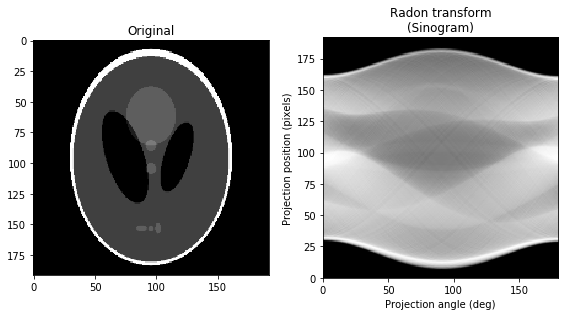

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale
from skimage.transform import iradon

image = imread(data_dir + "/phantom.png", as_gray=True)
image = rescale(image, scale=0.48, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
print(sinogram.shape)
plt.show()

In [45]:
def generate_sinograms(image, theta_min, theta_max, theta_step_list):
    thetas = []
    sinograms = []
    if isinstance(theta_step_list, list):
        for theta_steps in theta_step_list:
            theta = np.linspace(theta_min, theta_max, theta_steps, endpoint=False)
            thetas.append(theta)
            sinogram = radon(image, theta=theta, circle=True)
            sinograms.append(sinogram)
    else:
        theta = np.linspace(theta_min, theta_max, theta_step_list, endpoint=False)
        thetas.append(theta)
        sinogram = radon(image, theta=theta, circle=True)
        sinograms.append(sinogram)
    return sinograms, thetas

def plot_images(images):
    if isinstance(images, list):
        for image in images:
            plt.figure()
            plt.imshow(image, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')    
    else:
        plt.figure()
        plt.imshow(images, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

def noisify(image, amplitude):
    max_image = image.max()
    epsilon = np.random.standard_normal(image.shape)
    return image+amplitude*max_image*epsilon

def reconstruct_images(sinograms, thetas):
    reconstructions = []
    errors = []
    for (sinogram, theta) in zip(sinograms, thetas):
        reconstruction = iradon(sinogram, theta=theta, circle=True)
        error = reconstruction - image
        reconstructions.append(reconstruction)
        errors.append(error)
    return reconstructions, errors


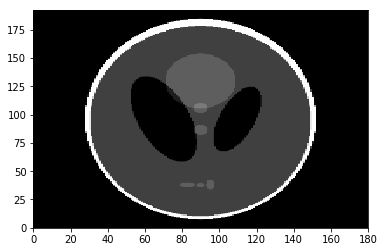

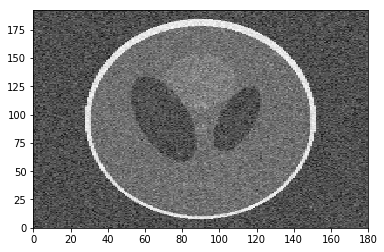

In [52]:
sigma_rel = 0.1

plot_images(image)
noisy_image = noisify(image, sigma_rel)
plot_images(noisy_image)
plt.show()

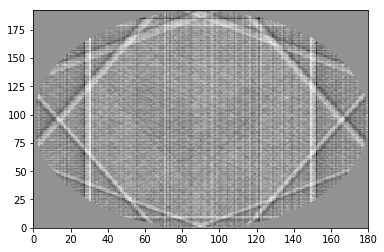

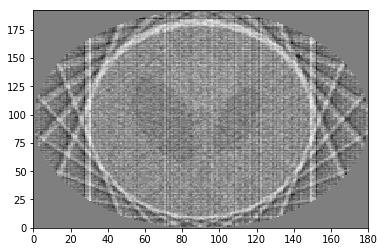

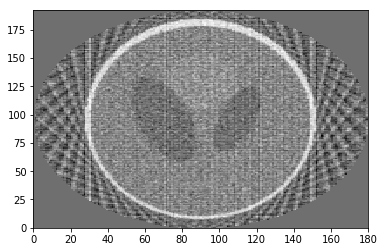

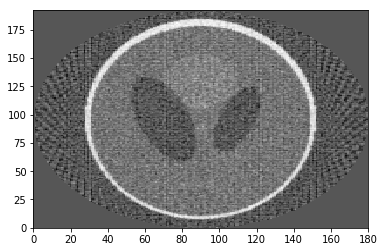

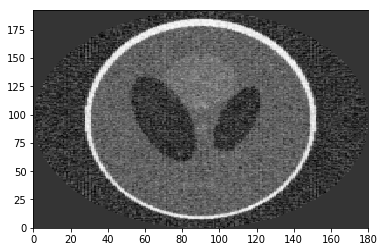

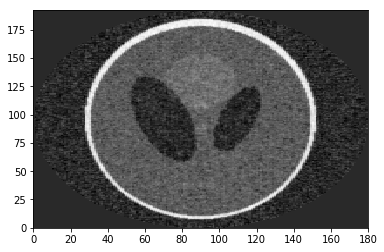

In [55]:
theta_min = 0
theta_max = 180
theta_step_list = [6, 12, 24,48,96,192]
[sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
[reconstructed_images, _] = reconstruct_images(sinograms, thetas)
plot_images(reconstructed_images)
plt.show()

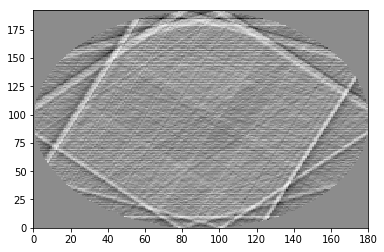

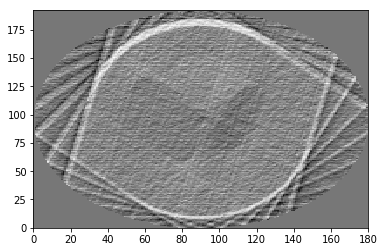

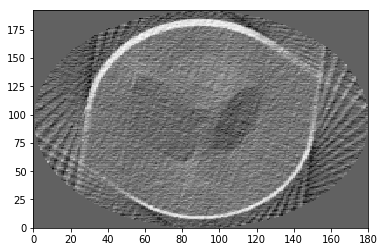

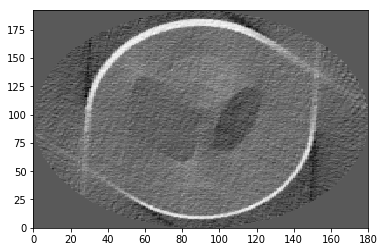

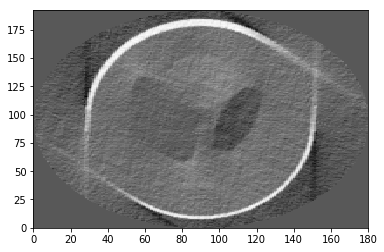

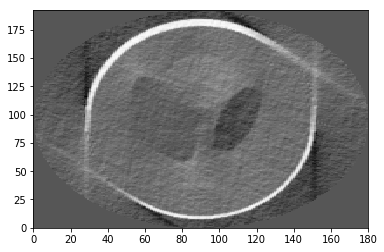

In [56]:
theta_min = 45
theta_max = 180
theta_step_list = [6, 12, 24,48,96,192]
[sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
[reconstructed_images, _] = reconstruct_images(sinograms, thetas)
plot_images(reconstructed_images)
plt.show()

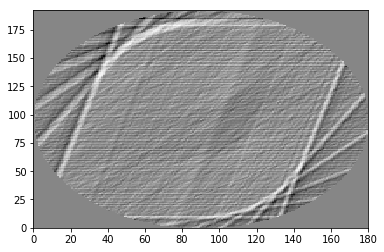

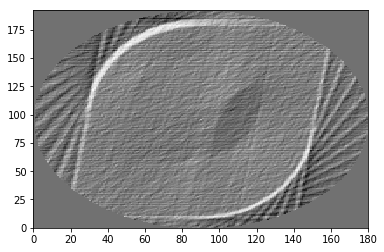

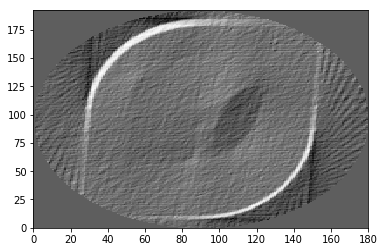

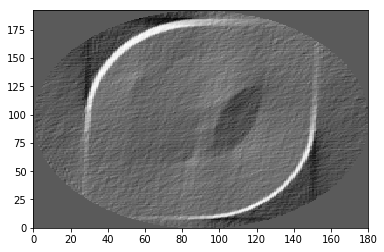

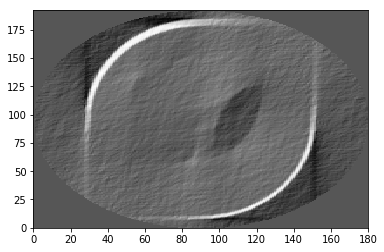

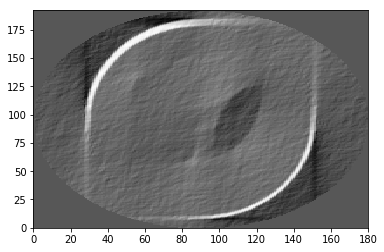

In [57]:
theta_min = 90
theta_max = 180
theta_step_list = [6, 12, 24,48,96,192]
[sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
[reconstructed_images, _] = reconstruct_images(sinograms, thetas)
plot_images(reconstructed_images)
plt.show()

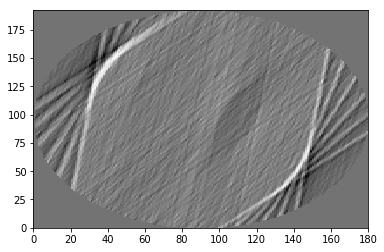

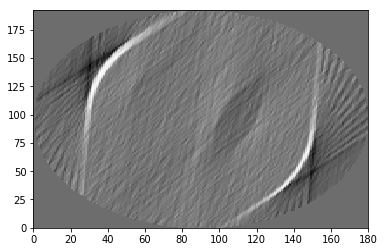

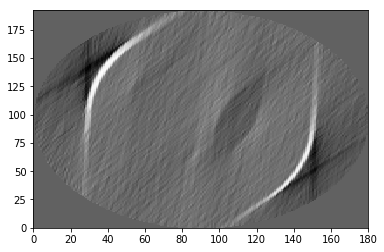

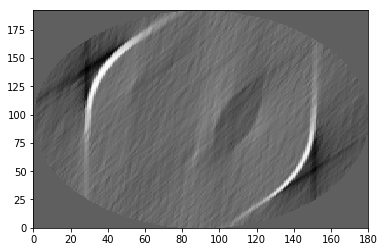

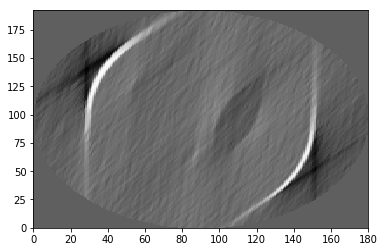

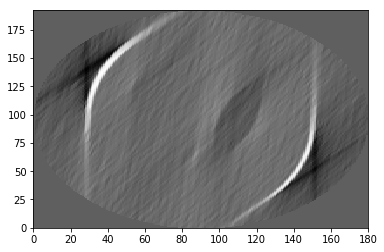

In [58]:
theta_min = 135
theta_max = 180
theta_step_list = [6, 12, 24,48,96,192]
[sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
[reconstructed_images, _] = reconstruct_images(sinograms, thetas)
plot_images(reconstructed_images)
plt.show()

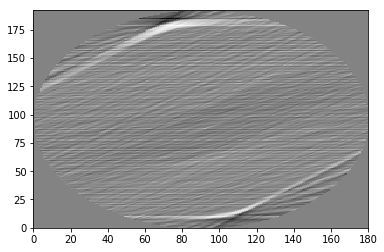

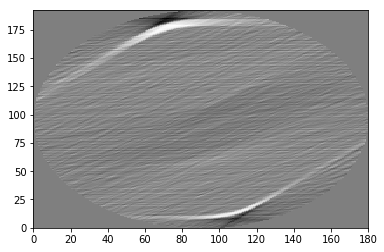

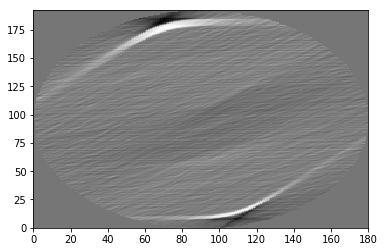

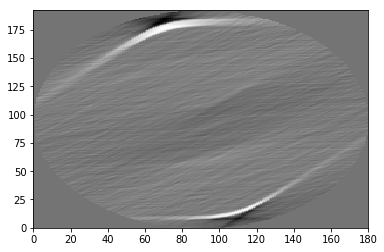

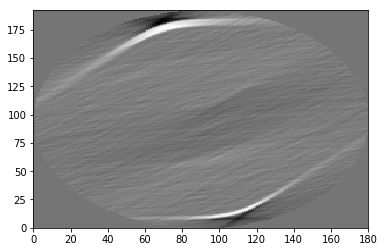

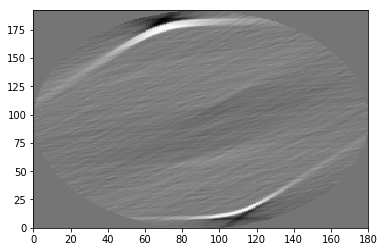

In [59]:
theta_min = 90
theta_max = 135
theta_step_list = [6, 12, 24,48,96,192]
[sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
[reconstructed_images, _] = reconstruct_images(sinograms, thetas)
plot_images(reconstructed_images)
plt.show()

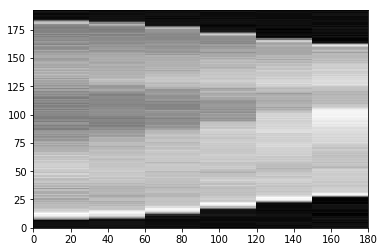

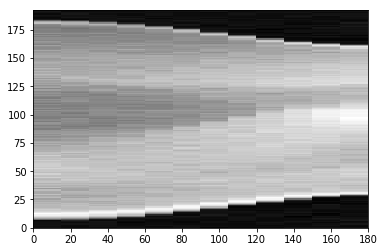

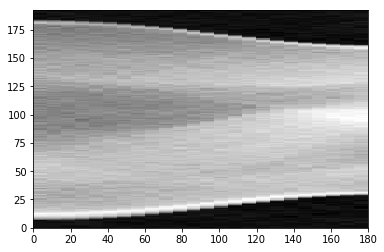

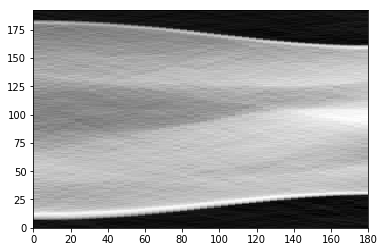

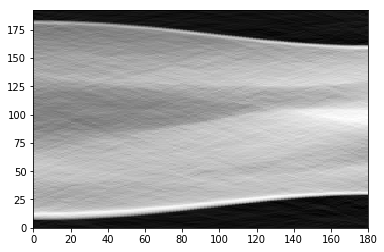

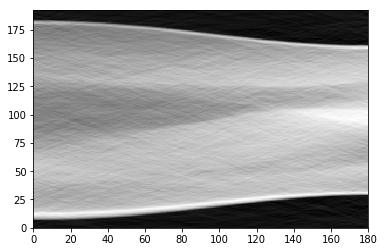

In [61]:
theta_min_list = [0,12,24,48,96,144]
theta_max = 180
theta_steps_list = max(noisy_image.shape)
[sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
plot_images(sinograms)

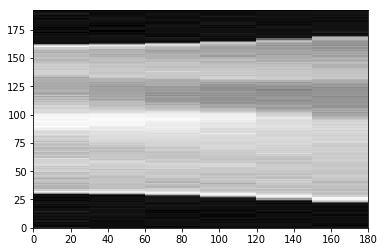

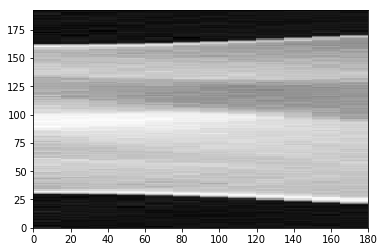

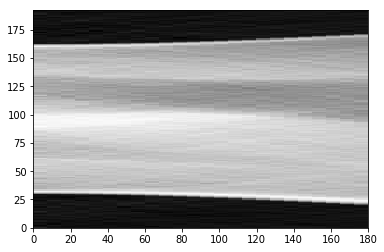

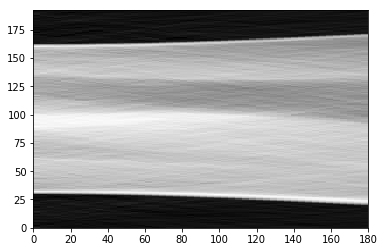

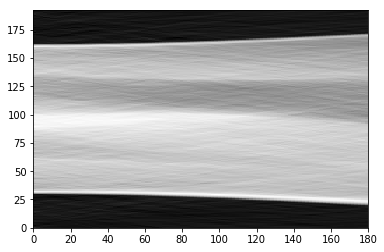

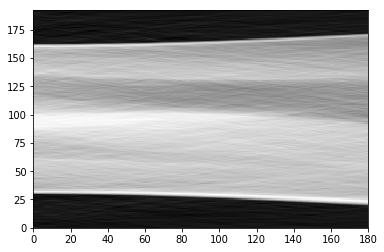

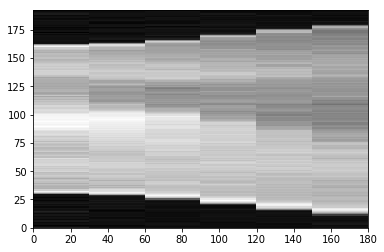

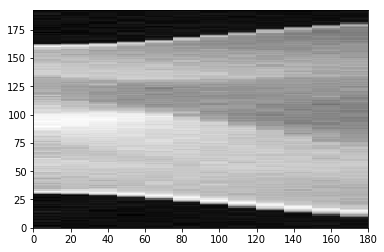

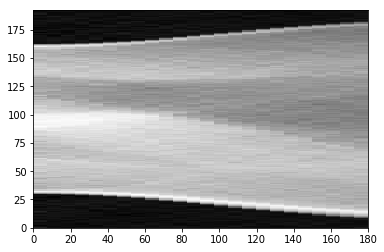

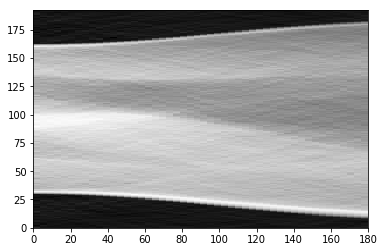

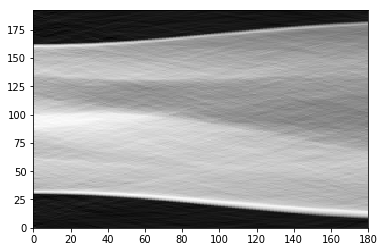

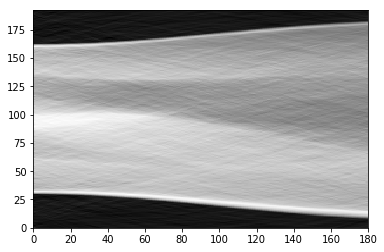

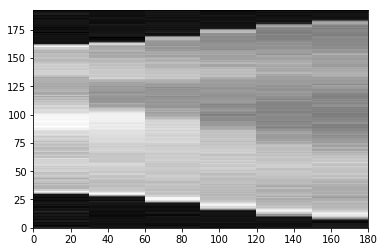

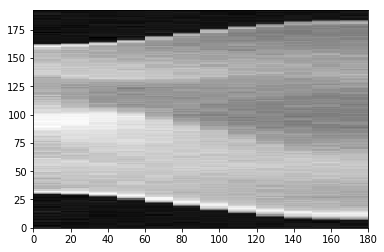

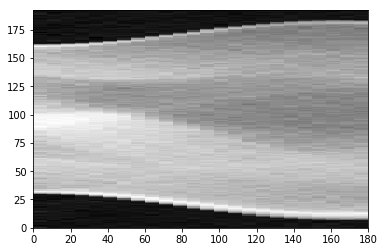

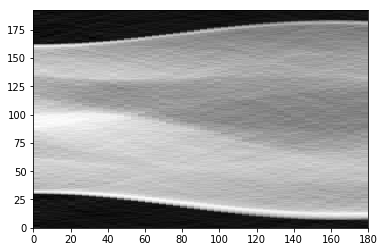

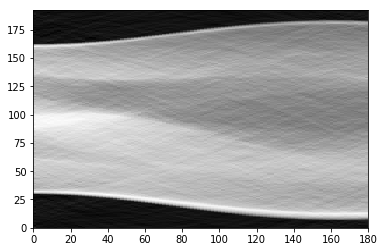

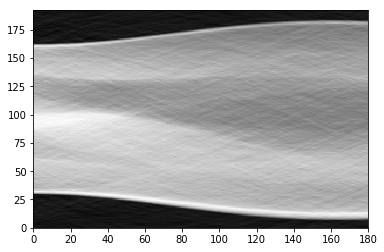

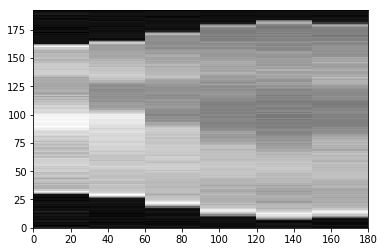

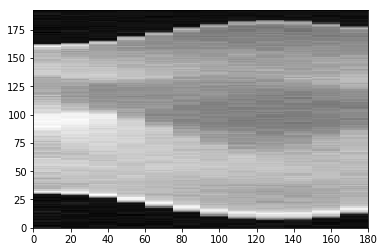

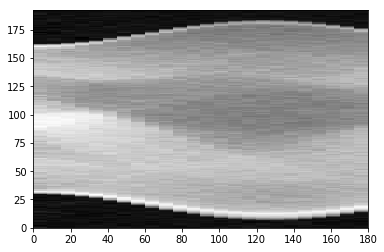

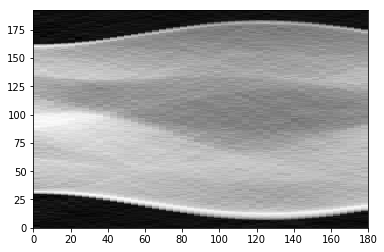

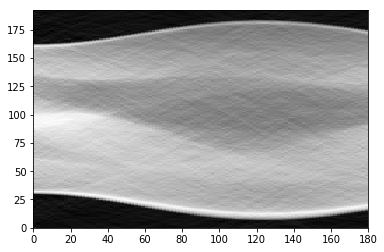

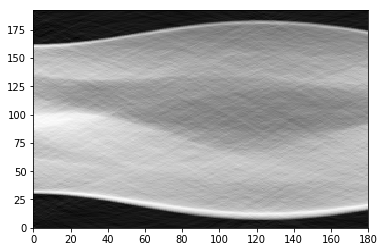

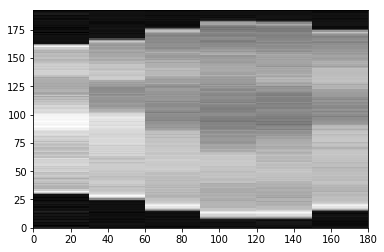

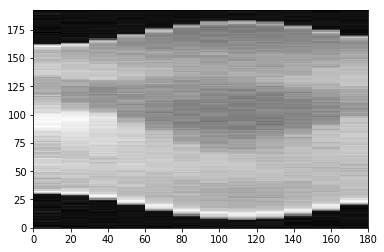

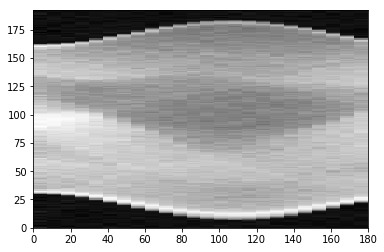

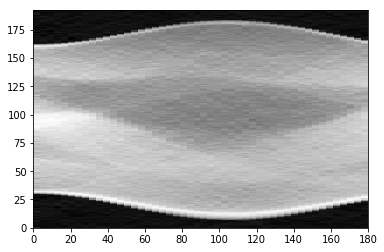

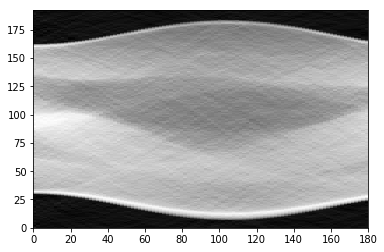

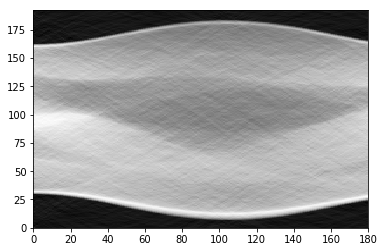

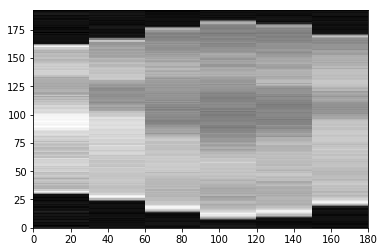

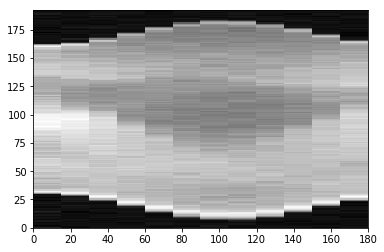

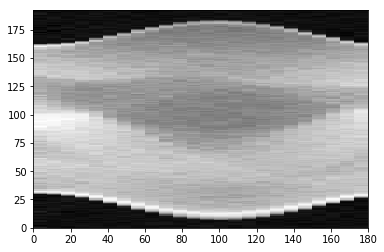

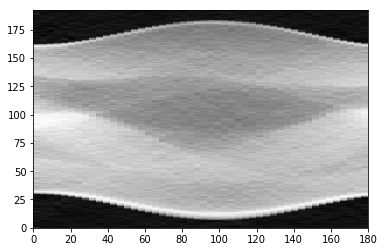

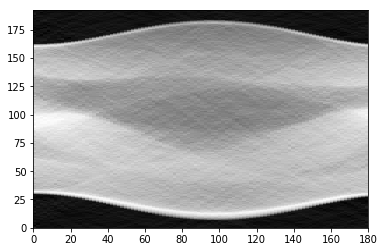

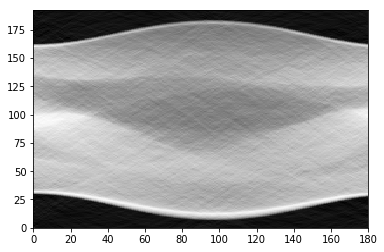

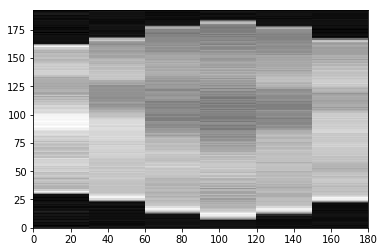

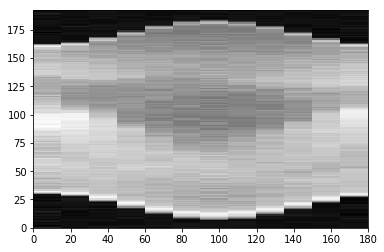

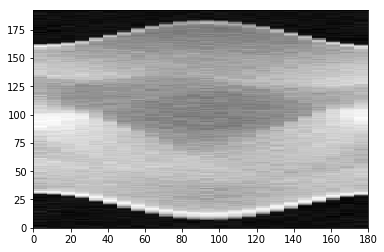

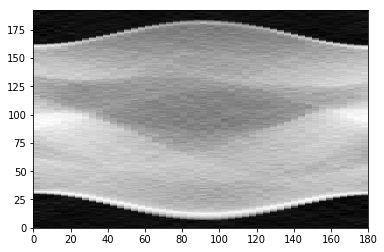

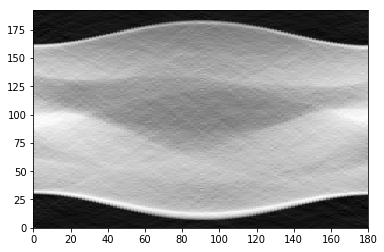

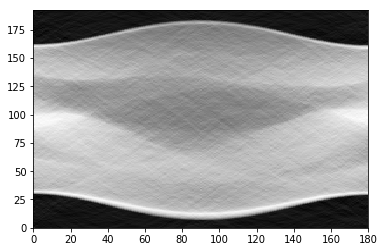

In [65]:
theta_min = 0
theta_max_list = [40,75,100,132,156,168,180]
theta_steps_list = max(noisy_image.shape)
for theta_max in theta_max_list:
    [sinograms, thetas] = generate_sinograms(noisy_image,theta_min,theta_max,theta_step_list)
    plot_images(sinograms)

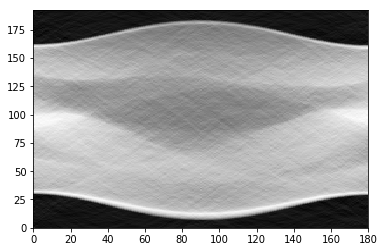

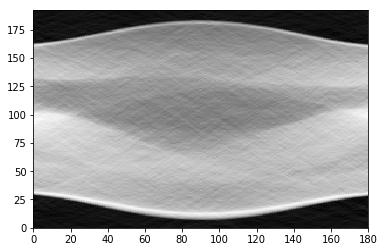

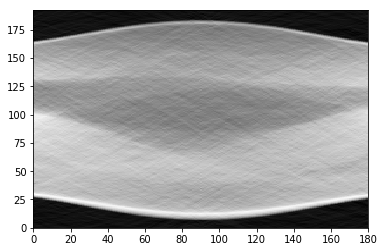

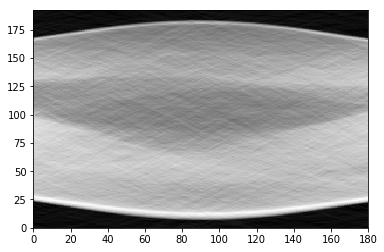

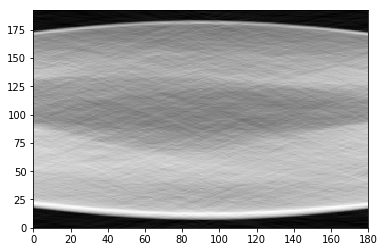

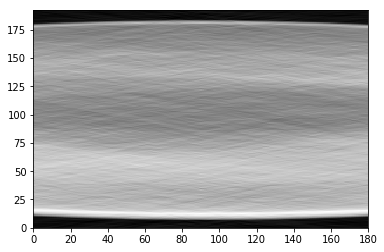

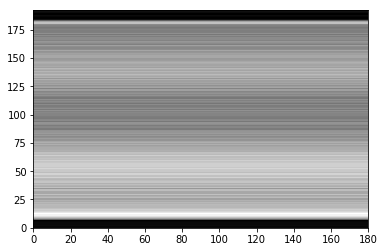

In [67]:
int_list = [0,10,20,30,45,65,90]
theta_min = 0
theta_max = 180
theta_step_list = max(noisy_image.shape)
for ints in int_list:
    [sinograms, thetas] = generate_sinograms(noisy_image,theta_min+ints,theta_max-ints,theta_step_list)
    plot_images(sinograms)